# This jupyter notebook is prepared by “Joseph Torres”.

### 1. Run the block below to upload the dataset. (Note that the file list gets refreshed every time your runtime is disconnected. Simply run this when you return to upload the file again using the files API. Once you run, it should wait for you to upload the file. (1pt) 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving startup_info_.csv to startup_info_.csv


### 2. Import numpy, pandas, matplotlib.pyplot and seaborn packages. (2pt)
###### If you need additional packages, you can import it on the go in any code-block below.

In [2]:
#TODO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Import the dataset into a pandas dataframe. Then report how many rows and columns are present in the dataset. (2pt)

In [7]:
#TODO
df = pd.read_csv(r'startup_info_.csv')
print("Number of Rows:", len(df.axes[0]))
print("Number of Columns:",len(df.axes[1]))

Number of Rows: 923
Number of Columns: 28


### 4. Call the describe method to see summary statistics of the numerical attribute columns. (1pt)

In [6]:
#TODO
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,16.000000,1.000000


### 5.1 List all attribute columns (1pt)

In [8]:
#TODO
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'category_code',
       'object_id', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

## 5.2 The "Unnamed: 0","Unnamed: 6", "state_code.1" and "object_id" feature columns are not useful. Drop them in-place. (1pt) 

In [9]:
#TODO
df = df.drop(columns = ["Unnamed: 0", "Unnamed: 6", "state_code.1", "object_id"])

## 6.1 Show all the numeric columns and save it to a new dataframe. (2pt)

In [10]:
#TODO
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)

## 6.2 Plot distributions of the numeric columns using histogram and record the skew of each distribution. (Note: positive value = right skewed, negative value = left skewed) (4pt)

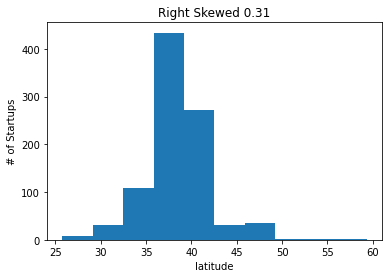

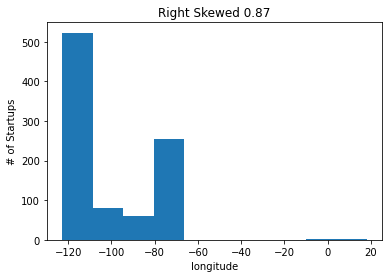

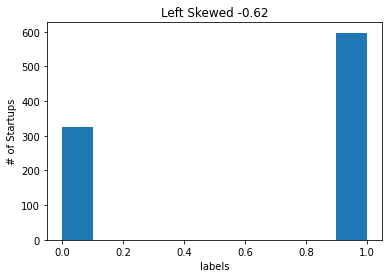

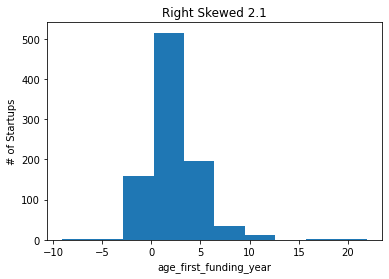

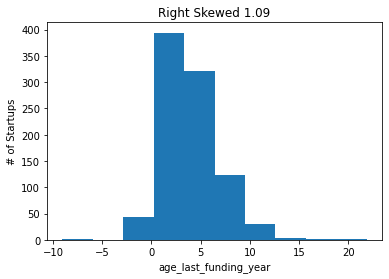

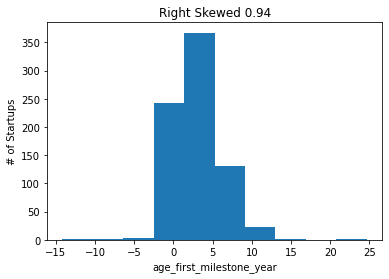

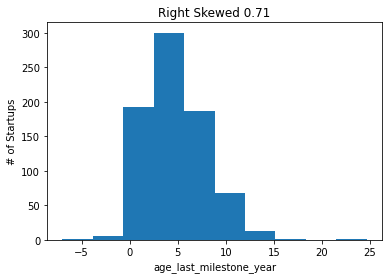

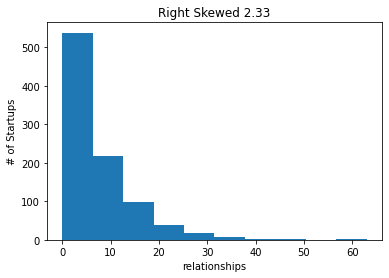

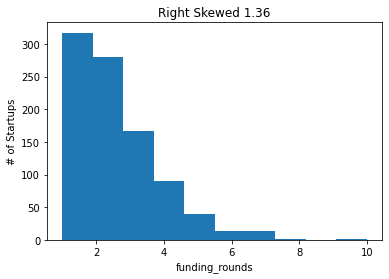

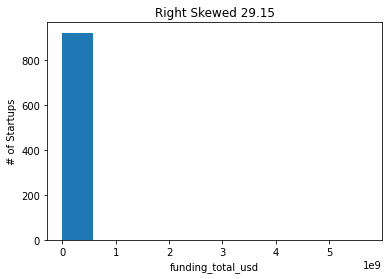

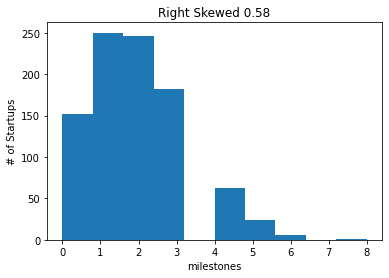

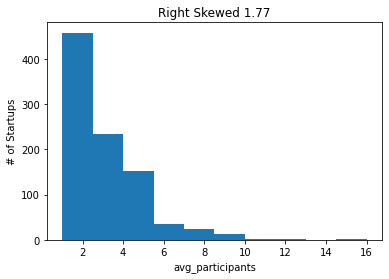

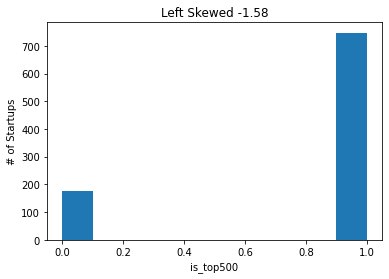

In [11]:
#TODO
def skew_lr(num):
  num = float("{:.2f}".format(num))
  if num > 0:
    return "Right Skewed " + str(num)
  else:
    return "Left Skewed " + str(num)

def createHist(strCol, num):
  plt.hist(newdf[strCol], bins = 10)
  plt.xlabel(strCol)
  plt.ylabel("# of Startups")
  plt.title(skew_lr(num))
  plt.show()

arr = newdf.skew()
for k, v in arr.items():
  createHist(k, v)

## 7. Show all the categorical columns and save it to a new dataframe. (2pt)

In [12]:
#TODO
catDf = df.select_dtypes(exclude=["number"])
catDf.head()

,state_code,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,category_code,status
0,CA,92101,c:6669,San Diego,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,music,acquired
1,CA,95032,c:16283,Los Gatos,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,enterprise,acquired
2,CA,92121,c:65620,San Diego,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,web,acquired
3,CA,95014,c:42668,Cupertino,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,software,acquired
4,CA,94105,c:65806,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,games_video,closed


## 8. Examine missing values (2+2+3=7pt)

### 8.1 Show a list with column wise count of missing values and display the list in count wise descending order.

In [13]:
#TODO
print("Missing values in each column", df.isnull().sum().sort_values(ascending = False), sep = '\n')

Missing values in each column
closed_at                   588
age_last_milestone_year     152
age_first_milestone_year    152
state_code                    0
age_last_funding_year         0
is_top500                     0
avg_participants              0
category_code                 0
milestones                    0
funding_total_usd             0
funding_rounds                0
relationships                 0
age_first_funding_year        0
latitude                      0
last_funding_at               0
first_funding_at              0
founded_at                    0
labels                        0
name                          0
city                          0
id                            0
zip_code                      0
longitude                     0
status                        0
dtype: int64


### 8.2 Show columnwise percentage of missing values.

In [14]:
#TODO
print("Missing value percentage in each column", df.isnull().sum().sort_values(ascending = False) / 923 * 100, sep = '\n')

Missing value percentage in each column
closed_at                   63.705309
age_last_milestone_year     16.468039
age_first_milestone_year    16.468039
state_code                   0.000000
age_last_funding_year        0.000000
is_top500                    0.000000
avg_participants             0.000000
category_code                0.000000
milestones                   0.000000
funding_total_usd            0.000000
funding_rounds               0.000000
relationships                0.000000
age_first_funding_year       0.000000
latitude                     0.000000
last_funding_at              0.000000
first_funding_at             0.000000
founded_at                   0.000000
labels                       0.000000
name                         0.000000
city                         0.000000
id                           0.000000
zip_code                     0.000000
longitude                    0.000000
status                       0.000000
dtype: float64


### 8.3 Display a bar plot to visualize only the columns with missing values and their percentage count.

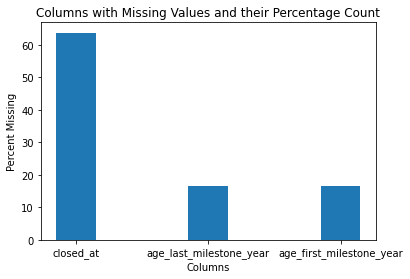

In [16]:
#TODO
missingArr = df.isnull().sum().sort_values(ascending = False) / 923 * 100
labels = []
values = []
for k, v in missingArr.items():
  if v != 0.0:
    labels.append(k)
    values.append(v)
  
plt.bar(labels, values, width = 0.3)
plt.xlabel("Columns")
plt.ylabel("Percent Missing")
plt.title("Columns with Missing Values and their Percentage Count")
plt.show()

## 9. Label Encoding : Copy the dataframe to a new one. Then using scikitlearn's Label Encoder, transform the "status" column to 0-1. (5pt)

In [17]:
#TODO
from sklearn import preprocessing
encDf = df
encode_column = 'status'
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(encDf[encode_column])
encDf[encode_column] = labelEncoder.transform(encDf[encode_column])

encDf.head()

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,...,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,...,4.6685,6.7041,3,3,375000,3,music,1.0000,0,0
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,...,7.0055,7.0055,9,4,40100000,1,enterprise,4.7500,1,0
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,NaN,...,1.4575,2.2055,5,1,2600000,2,web,4.0000,1,0
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,...,6.0027,6.0027,5,3,40000000,1,software,3.3333,1,0
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,...,0.0384,0.0384,2,2,1300000,1,games_video,1.0000,1,1


## 10. Correlation: Use seaborn's heatmap to visualize the correlation between numeric features. (3pt)

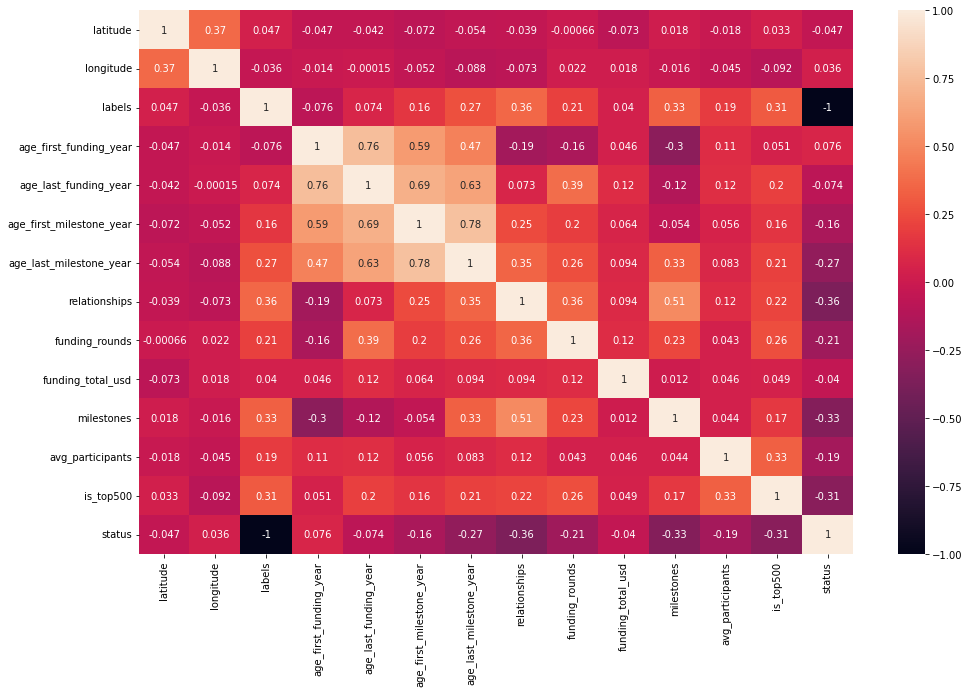

In [18]:
#TODO
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corrDf = encDf.select_dtypes(include=numerics)
corr = corrDf.corr()

plt.figure(figsize = (16, 10))
sns.heatmap(corr,vmin = -1, vmax = 1, annot = True)
plt.show()

## 11.1 Use seaborn's countplot to visualize relationship between "*state_code*" and "*labels*". Comment on which state produced majority of successful startups (3pt)

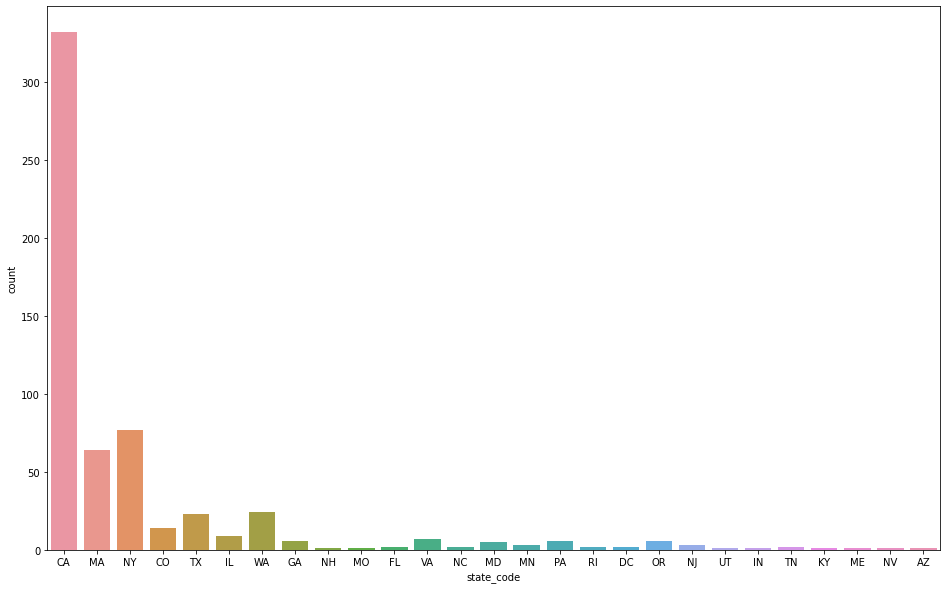

In [20]:
#TODO
plt.figure(figsize = (16, 10))
suc = df.loc[df['labels'] > 0, ['state_code']]
unsuc = df.loc[df['labels'] < 0, ['state_code']]
sns.countplot(x = suc['state_code'])
plt.show()
#California

## 11.2 Use seaborn's countplot to visualize relationship between "*milestones*" and "*labels*". Comment on which milestone made the statistically highest number of successful startups (3pt)

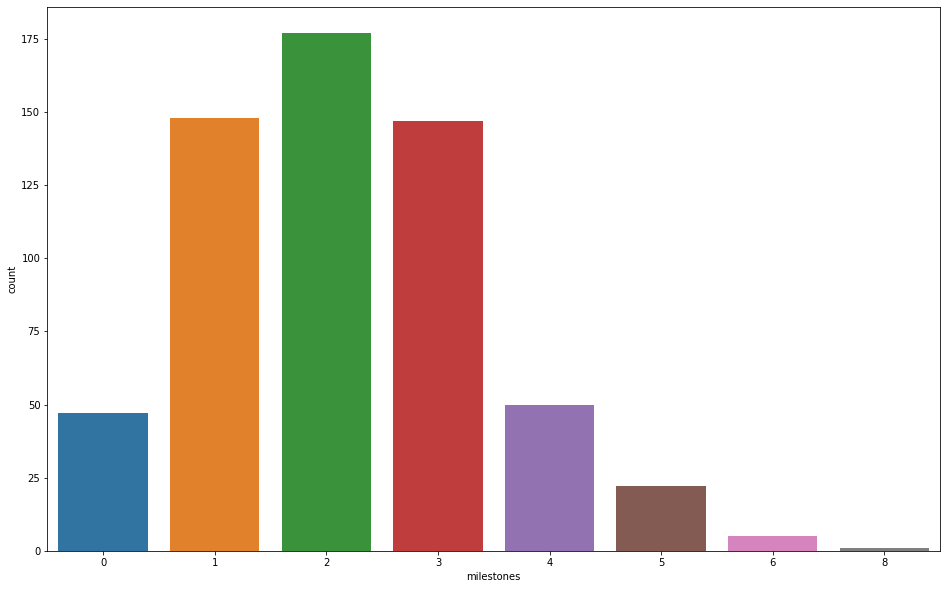

In [21]:
#TODO
plt.figure(figsize = (16, 10))
suc = df.loc[df['labels'] > 0, ['milestones']]
sns.countplot(x = suc['milestones'])

# Milestone 2 has the most successful startups.

## 12. Drop features with duplicate values in-place, then show dataframe's new shape. (1pt)

In [22]:
#TODO
droppedDups = df
droppedDups.drop_duplicates()
print(droppedDups.shape)

(923, 24)


## 13. From correlation heatmap above, comment on which feature has the highest correlation with "*funding_rounds*". Visualize a scatterplot with that and "*funding_rounds*". (3+3 = 6pt)

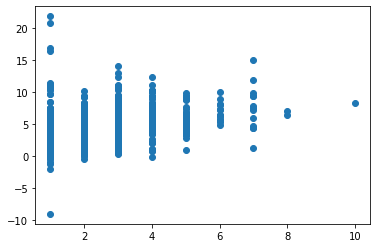

In [23]:
#TODO
plt.scatter(corrDf['funding_rounds'], corrDf['age_last_funding_year'])
plt.show()

## 14. Show boxplots for the numeric features to detect outliers. (4pt)

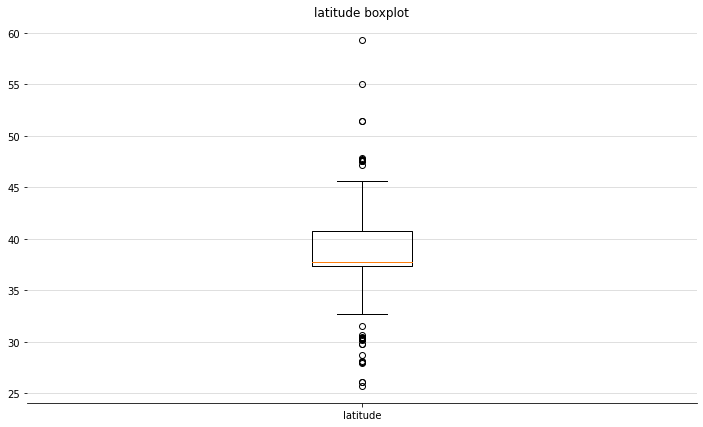

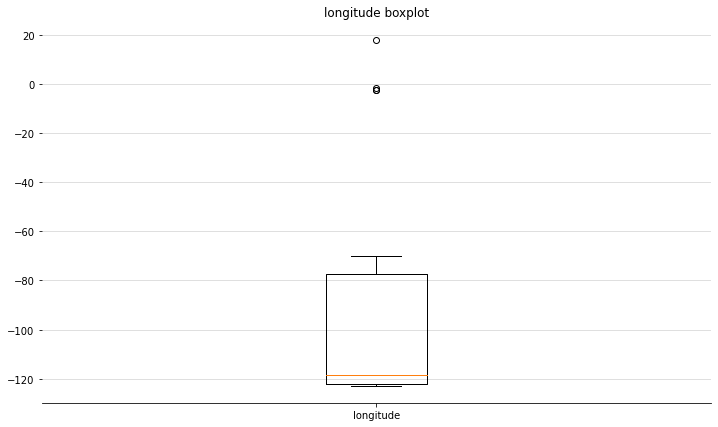

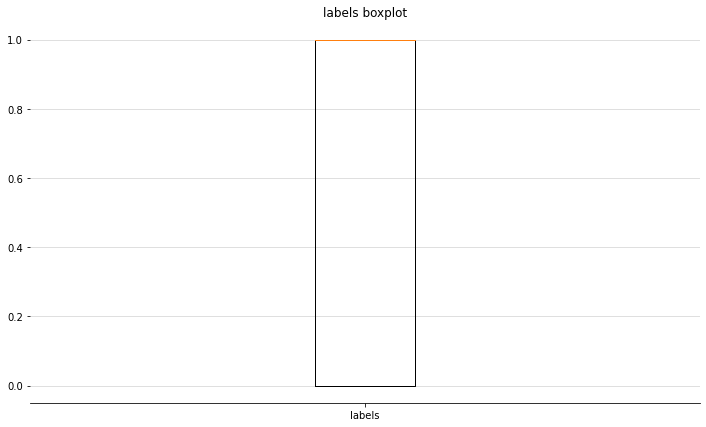

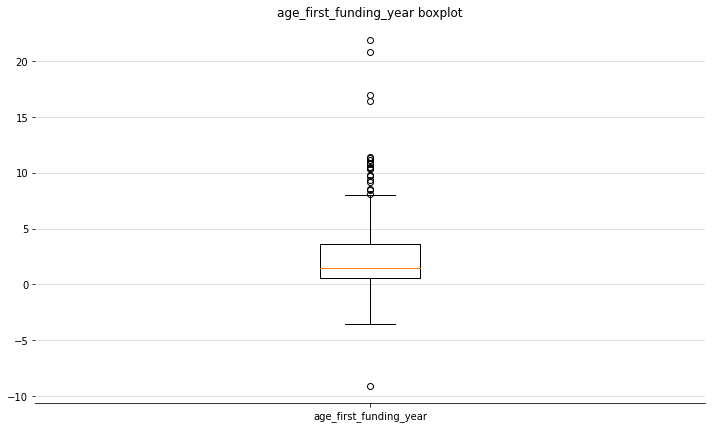

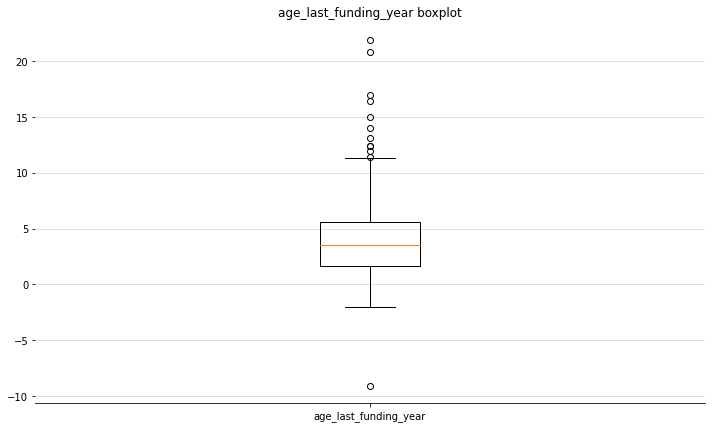

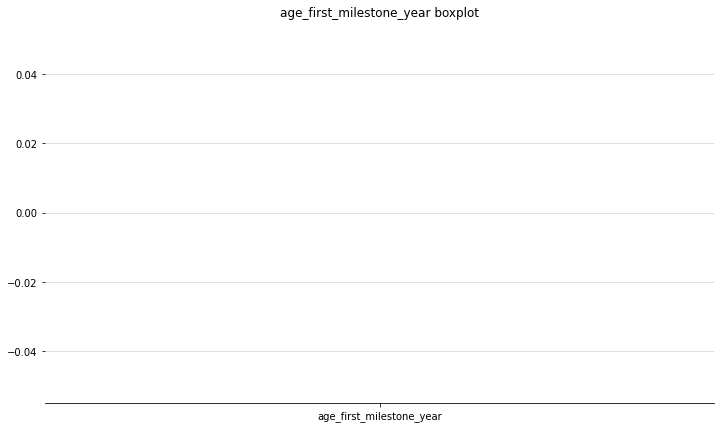

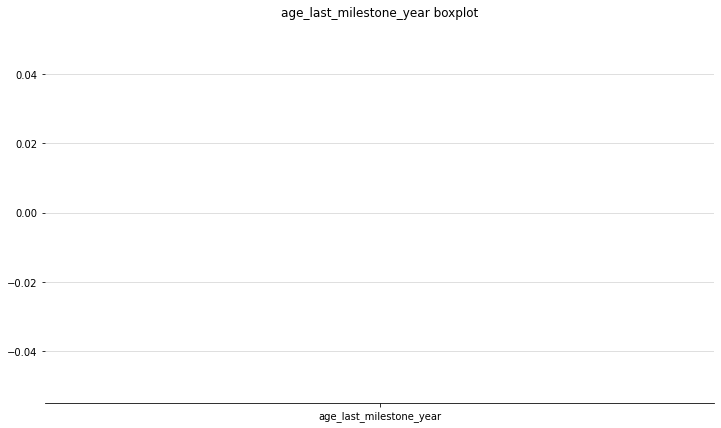

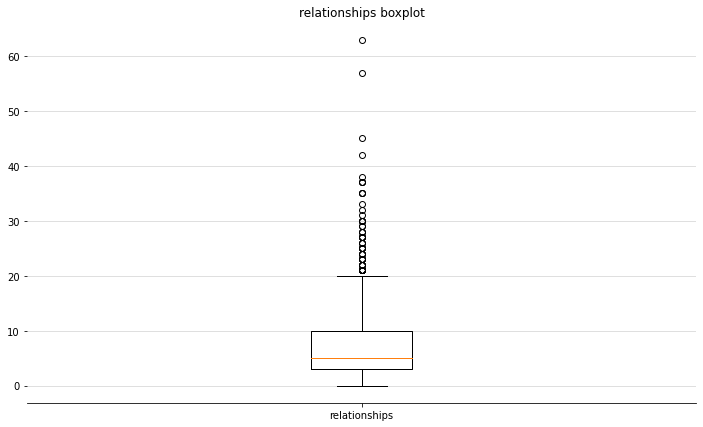

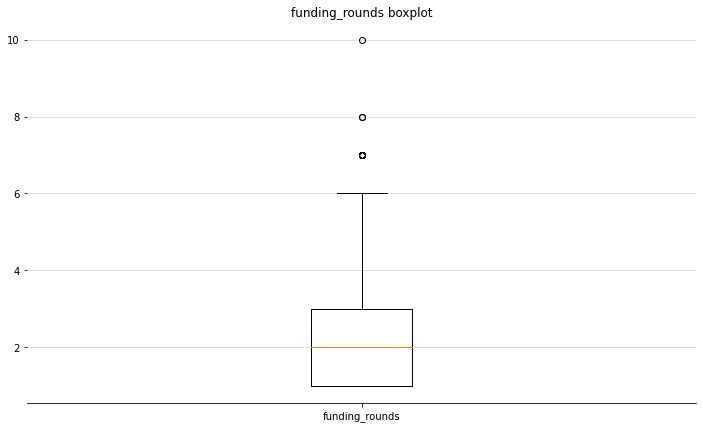

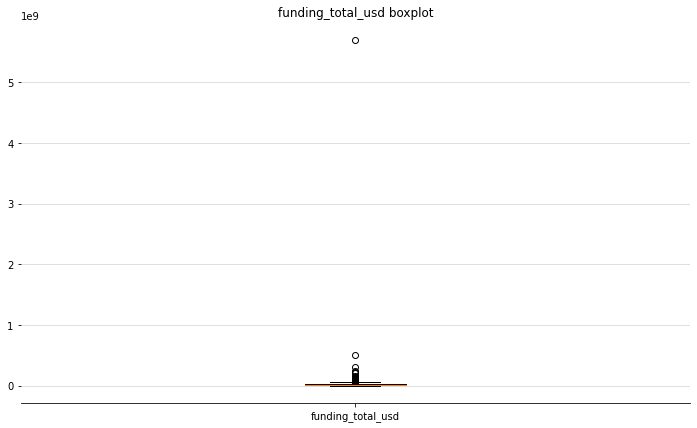

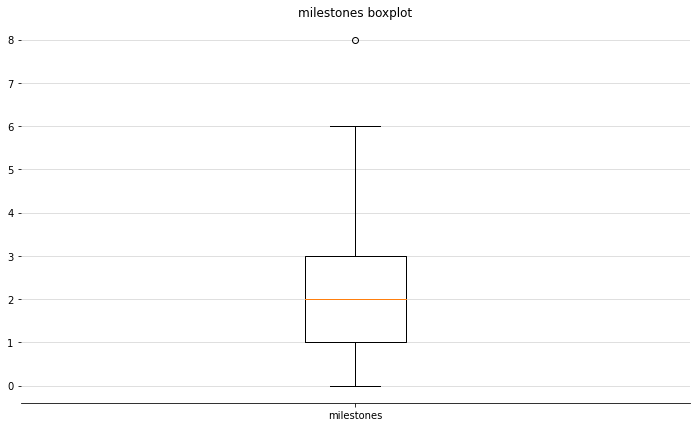

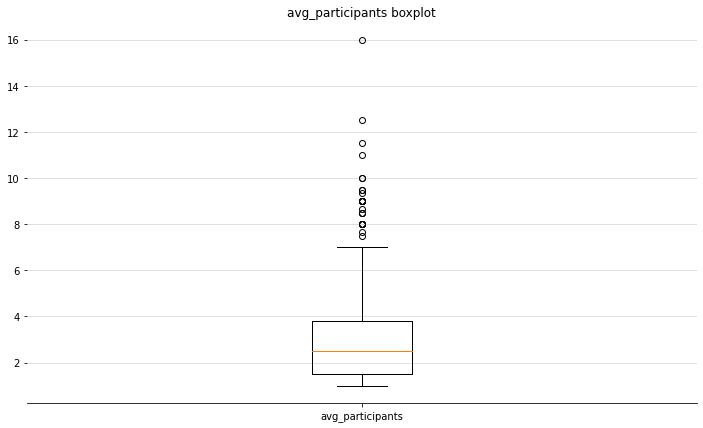

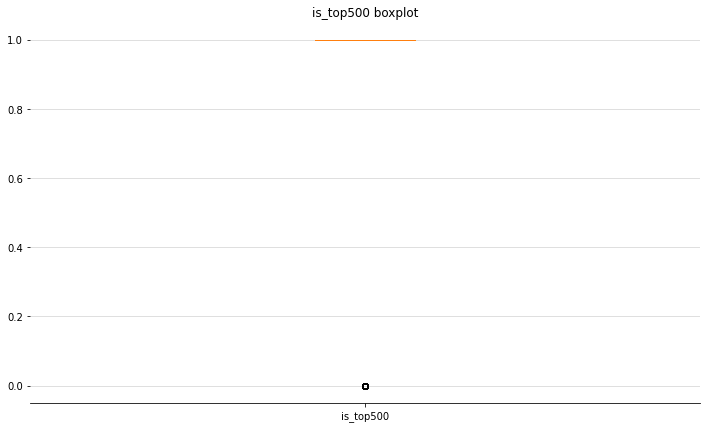

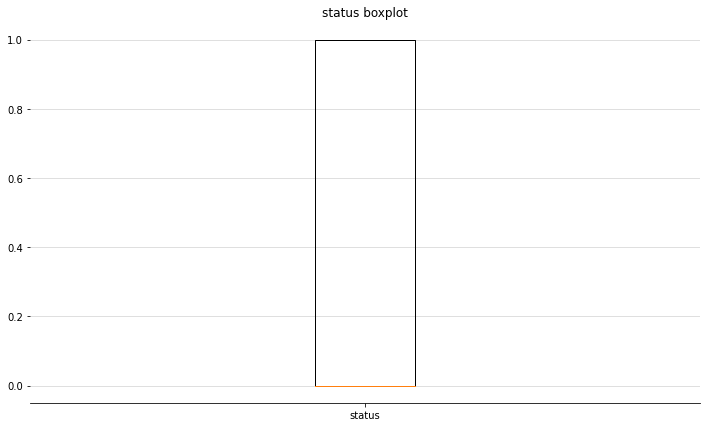

In [24]:
#TODO
def createBox(strCol):
  fig, ax = plt.subplots(figsize=(12, 7))
  

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.5, alpha=0.5)
  ax.set_title(strCol + " boxplot")
  plt.boxplot(df[strCol], labels = [strCol])
  plt.show()

for k, v in corrDf.items():
  createBox(k)
  print("")

## 15. Summary and Discussion: Mention what additional steps are required to use this dataset in a binary classifier. Eg: any column to remove, any record to remove, any distribution to rebalance, any features to be joined together to generate new feature etc. (2pt)

#####TODO

In [25]:
'''
The data we would want to train on should be all in a numerical sense. The state that the startup originates from can be put as an arbitrary number
to then use a means of correlation, so can all other categorical data, this is assuming we want to work with all the data given. We should also be able
to remove latitude, longitude, and zip code and get a geographical sense of each startup with city and state only, maybe even just state as we might potentially
run the case of overfitting. We then fit a logistic regression model and calculate a confusion matrix to be able to calculate an accurary score.
'''

'\nThe data we would want to train on should be all in a numerical sense. The state that the startup originates from can be put as an arbitrary number\nto then use a means of correlation, so can all other categorical data, this is assuming we want to work with all the data given. We should also be able\nto remove latitude, longitude, and zip code and get a geographical sense of each startup with city and state only, maybe even just state as we might potentially\nrun the case of overfitting. We then fit a logistic regression model and calculate a confusion matrix to be able to calculate an accurary score.\n'